<a href="https://colab.research.google.com/github/JoshARogers/teaching-network-science/blob/main/hw1/HW1_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/anwala/teaching-network-science/blob/main/spring-2023/week-1/data_340_02_report_template.ipynb)

# Homework 1 - Network elements
### Joshua Rogers
### DATA 340-02, Spring 2023
### February 14, 2023

##Q1
Go through the [tutorial on Network elements](https://github.com/anwala/teaching-network-science/blob/main/spring-2023/week-2/data_340_02_s23_chp_01_network_elements.ipynb).

Implement functions for Exercises 1 -- 3

###Answer

In [1]:
import networkx as nx
%matplotlib inline
nx.__version__

'3.0'

###Exercise 1

Often in the context of trees, a node with degree 1 is called a leaf. Write a function named get_leaves that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

DegreeView({'a': 2, 'b': 2, 'c': 3, 'd': 1})

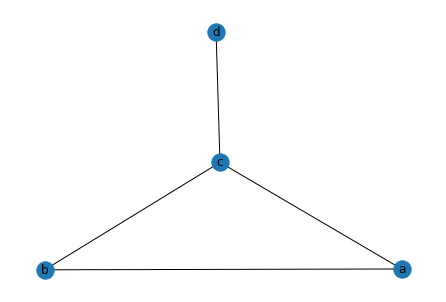

In [2]:
#sample graph
# a "plain" graph is undirected
G = nx.Graph()

# give each a node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# add edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b')

# just like add_nodes_from, we can add edges from a sequence
# edges should be specified as 2-tuples
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# draw the graph
nx.draw(G, with_labels=True)

G.degree()

In [3]:
def get_leaves(G):
  degree = G.degree()
  deg = dict(degree)
  leaves_dict = {}
  for k, v in deg.items():
    if v == 1: 
      leaves_dict[k] = v
  leaves = list(leaves_dict.keys())
  return(leaves)

In [4]:
get_leaves(G)

['d']

###Exercise 2

Write a function max_degree that takes a graph as its argument, and returns a 2-tuple with the name and degree of the node with highest degree.

In [19]:
def max_degree(G):
  degree = G.degree()
  deg = dict(degree)
  max_dict = {}
  maxdeg = max(deg.values())
  for k, v in deg.items():
    if v == maxdeg: 
      max_dict[k] = v
  max_tuple = list(zip(max_dict.keys(), max_dict.values()))
  return(max_tuple)

In [20]:
max_degree(G)

[('c', 3)]

###Exercise 3

Write a function mutual_friends that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes

In [21]:
def mutual_friends(G, node_1, node_2):
  mutual = []
  mutual_friends = []
  a = list(G.neighbors(node_1))
  b = list(G.neighbors(node_2))
  for i in a:
    mutual.append(i)
  for i in b: 
    mutual.append(i)
  for i in mutual:
    if mutual.count(i) > 1:
      mutual_friends.append(i)
  return(list(set(mutual_friends)))

In [22]:
print(mutual_friends(G, 'a', 'b'))
print(mutual_friends(G, 'a', 'c'))
print(mutual_friends(G, 'a', 'd'))


['c']
['b']
['c']


### Discussion

For each function, I utilized a sample graph from the excersises. For get_leaves, I first created deg, which made G.degree into a dict (when I tried to run the function while only using G.degree, I kept receiving errors). From there, I ran a function that stated for the keys and values in the dictionary, if any value was equivalent to 1, then to place that values key in a new dictionary. Lastly, I changed the new dictionary into a list (note, I needed a refresher on how to iterate through a dictionary in python, so I used a source which is listed in references). 

For max_degree, I followed the first step as above, which was to convert G.degree into a dictionary, and to create an empty dictionary. Then, I created a value which pulled the max value from the dictionary. From there, I iterated through the items in the dictionary and pulled items whose values matched the max degree. Lastly, I converted the new dictionary into a tuple. (Note, I had a lot of trouble with this so I utilized a source that showed me how to use zip to obtain this, listed in references)

Lastly, for mutual friends, I started by creating two empty list. then, I created two additional lists, one with the neighbors of node 1, and one with the neighbors of node two. Next, I appended all neighbors of nodes 1 & 2 into the first empty list. Then, I ran a loop that put neighbors that appeared more then once in the newly created list into the second empty list. Lastly, to make sure I only returned unique values, I set the list (note, I needed a review on how to use set, so I used a source, which is listed in references). 


##Q2
Consider this adjacency matrix.

![](https://raw.githubusercontent.com/anwala/teaching-network-science/main/spring-2023/homework/hw1/adj_mat.png)

An entry in the ith row and jth column indicates the weight of the link from node i to node j. For instance, the entry in the second row and third column is 2, meaning the weight of the link from node B to node C is 2. What kind of network does this matrix represent?

a. Undirected, unweighted

b. Undirected, weighted

c. Directed, unweighted

d. Directed, weighted


###Answer

d. Directed, weighted

###Discussion

This graph is directed and weighted. We can tell that it is directed because the matrixes are not symmetrical. For example, in the bottom row (F, A), there is an indicated link whereas in the top row (A,F), there is no indication of a link. This would imply that in this case, F is the source node and A is the target node, meaning that this link has direction. This network is weighted because the weights are not universally the same (e.g. all links have w as 1). For example, in the bottom row, first column (F,A,2), the link has a weight of 2. Converesly, the bottom row, third column (F,C,3) has a weight of 3. This indicates that the links are weighted. 

##Q3

Consider the network defined by the adjacency matrix in Q2. How many nodes are in this network? How many links? Are there any self-loops?

Discuss how you arrived at your answer.

###Answer

- 6 Nodes
- 9 Links
- 0 Self-Loops

###Discussion

There are six rows/columns in the matrix (A,B,C,D,E,F). This would indicate that the network contains six nodes. 

In the matrix, there are 10 indexes that are numbered 1,2, or 3. However, (E,F,1) and (F,E,1) are the same link (meaning that this link is undirected). Therefore, there are nine links in the network. 

The Diagonal elements in the matrix (row 1 column 1, row 2, column 2, etc.) are all zero. As a self loop is a link that has the same source and target node (meaning that e.g. the A,A weight would not equal zero), this means that there are no self loops in this network. 

## Q4

Webflix keeps data on customer preferences using a bipartite network connecting users to movies they have watched and/or rated. Webflix's movie library contains approximately 1,000 movies. In the fourth quarter of 2022, Webflix reported having about 5,000 users. Also, on average, a user has watched and/or rated 750 movies. Approximately how many links are in this network? Would you consider this network sparse or dense? Explain.

N = 5000 users

N1 = 1000 movies 

K = 750

L (Bipartite Network)= (k*N)

Max Links (bipartite network)= (N1*N2)

Density = L/LMax






### Answer

In [18]:
n = 5000
n1 = 1000
k = 750
Lmax = int(n*n1)
print('LMax = ',Lmax)

L = int(k*n)
print('L = ',L)

#Density
print('Density = ', L/Lmax)
print('This network is sparse')


LMax =  5000000
L =  3750000
Density =  0.75
This network is sparse


### Discussion

In a bipartite network, nodes from the first group (e.g. users) can only have links connected to nodes from the second group (e.g. movies) to get the (approx) number of links, you would multiply the average degree by the number of users. In order to find the maximum amount of links, you would multiply the total number of nodes from the first group (users) by the total number of nodes from the second group of nodes (movies). To find the density, you would divide L by LMax. This network would be considered sparse, as d is less then 1. 

##References

Self-loops, https://networkx.org/documentation/stable/auto_examples/drawing/plot_selfloops.html

How to Iterate Through a Dictionary in Python, https://realpython.com/iterate-through-dictionary-python/

Convert dictionary to list of tuples in Python, https://www.tutorialspoint.com/convert-dictionary-to-list-of-tuples-in-python#:~:text=With%20zip,become%20tuples%20of%20the%20list.

Link Prediction in Bipartite Nested Networks, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7512339/#:~:text=Since%20the%20maximal%20possible%20number,present%20in%20the%20input%20data.

Python | set() method, https://www.geeksforgeeks.org/python-set-method/
